In [1]:
# 使用するパッケージの宣言
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

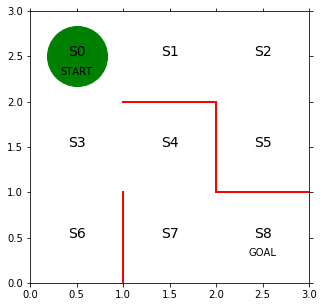

In [2]:
# 初期位置での迷路の様子

# 図を描く大きさと、図の変数名を宣言
fig = plt.figure(figsize=(5, 5))
ax = plt.gca()

# 赤い壁を描く
plt.plot([1, 1], [0, 1], color='red', linewidth=2)
plt.plot([1, 2], [2, 2], color='red', linewidth=2)
plt.plot([2, 2], [2, 1], color='red', linewidth=2)
plt.plot([2, 3], [1, 1], color='red', linewidth=2)

# 状態を示す文字S0～S8を描く
plt.text(0.5, 2.5, 'S0', size=14, ha='center')
plt.text(1.5, 2.5, 'S1', size=14, ha='center')
plt.text(2.5, 2.5, 'S2', size=14, ha='center')
plt.text(0.5, 1.5, 'S3', size=14, ha='center')
plt.text(1.5, 1.5, 'S4', size=14, ha='center')
plt.text(2.5, 1.5, 'S5', size=14, ha='center')
plt.text(0.5, 0.5, 'S6', size=14, ha='center')
plt.text(1.5, 0.5, 'S7', size=14, ha='center')
plt.text(2.5, 0.5, 'S8', size=14, ha='center')
plt.text(0.5, 2.3, 'START', ha='center')
plt.text(2.5, 0.3, 'GOAL', ha='center')

# 描画範囲の設定と目盛りを消す設定
ax.set_xlim(0, 3)
ax.set_ylim(0, 3)
plt.tick_params(axis='both', which='both', bottom='off', top='off',
                labelbottom='off', right='off', left='off', labelleft='off')

# 現在地S0に緑丸を描画する
line, = ax.plot([0.5], [2.5], marker="o", color='g', markersize=60)


In [3]:
# 行は状態0～7、列は移動方向で↑、→、↓、←を表す
theta_0 = np.array([[np.nan, 1, 1, np.nan],  # s0
                    [np.nan, 1, np.nan, 1],  # s1
                    [np.nan, np.nan, 1, 1],  # s2
                    [1, 1, 1, np.nan],  # s3
                    [np.nan, np.nan, 1, 1],  # s4
                    [1, np.nan, np.nan, np.nan],  # s5
                    [1, np.nan, np.nan, np.nan],  # s6
                    [1, 1, np.nan, np.nan],  # s7、※s8はゴールなので、方策はなし
                    ])

In [4]:
[a, b] = theta_0.shape
Q = np.random.rand(a, b) * theta_0

In [6]:
# 方策パラメータtheta_0をランダム方策piに変換する関数の定義

def simple_convert_into_pi_from_theta(theta):
    
    [m, n] = theta.shape
    pi = np.zeros((m, n))
        
    for i in range(0, m):
        pi[i, :] = theta[i, :] / np.nansum(theta[i, :])
        
    pi = np.nan_to_num(pi)
    
    return pi

In [8]:
pi_0 = simple_convert_into_pi_from_theta(theta_0)

In [9]:
pi_0

array([[ 0.        ,  0.5       ,  0.5       ,  0.        ],
       [ 0.        ,  0.5       ,  0.        ,  0.5       ],
       [ 0.        ,  0.        ,  0.5       ,  0.5       ],
       [ 0.33333333,  0.33333333,  0.33333333,  0.        ],
       [ 0.        ,  0.        ,  0.5       ,  0.5       ],
       [ 1.        ,  0.        ,  0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        ,  0.        ],
       [ 0.5       ,  0.5       ,  0.        ,  0.        ]])

In [11]:
# ε-greedy法を実装

def get_action(s, Q, epsilon, pi_0):
    direction =  ["up", "right", "down", "left"]
    
    if np.random.rand() < epsilon:
        next_direction = np.random.choice(direction, p=pi_0[s, :])
    else:
        next_direction = direction[np.nanargmax(Q[s, :])]
    
    if next_direction == "up":
        action = 0
    elif next_direction == "right":
        action = 1
    elif next_direction == "down":
        action = 2
    elif next_direction == "left":
        action = 3
    
    return action

In [12]:
def get_s_next(s, a, Q, epsilon, pi_0):
    direction =  ["up", "right", "down", "left"]
    next_direction = direction[a]
    
    if next_direction == "up":
        s_next = s - 3
    elif next_direction == "right":
        s_next = s + 1
    elif next_direction == "down":
        s_next = s + 3
    elif next_direction == "left":
        s_next = s - 1
    
    return s_next

In [13]:
# Sarsaによる行動価値関数Qの更新

def Sarsa(s, a, r, s_next, a_next, Q, eta, gamma):
    if s_next == 8:
        Q[s, a] = Q[s, a] + eta * (r - Q[s, a])
    else:
        Q[s, a] = Q[s, a] + eta * (r + gamma * Q[s_next, a_next] - Q[s, a])
    
    return Q

In [20]:
def goal_maze_ret_s_a_Q(Q, epsilon, eta, gamma, pi):
    s = 0  # スタート地点
    a = a_next = get_action(s, Q, epsilon, pi)  # 初期の行動
    s_a_history = [[0, np.nan]]  # エージェントの移動を記録するリスト

    while (1):  # ゴールするまでループ
        a = a_next  # 行動更新

        s_a_history[-1][1] = a
        # 現在の状態（つまり一番最後なのでindex=-1）に行動を代入

        s_next = get_s_next(s, a, Q, epsilon, pi)
        # 次の状態を格納

        s_a_history.append([s_next, np.nan])
        # 次の状態を代入。行動はまだ分からないのでnanにしておく

        # 報酬を与え,　次の行動を求めます
        if s_next == 8:
            r = 1  # ゴールにたどり着いたなら報酬を与える
            a_next = np.nan
        else:
            r = 0
            a_next = get_action(s_next, Q, epsilon, pi)
            # 次の行動a_nextを求めます。

        # 価値関数を更新
        Q = Sarsa(s, a, r, s_next, a_next, Q, eta, gamma)

        # 終了判定
        if s_next == 8:  # ゴール地点なら終了
            break
        else:
            s = s_next

    return [s_a_history, Q]

In [21]:
# Sarsaで迷路を解く

eta = 0.1  # 学習率
gamma = 0.9  # 時間割引率
epsilon = 0.5  # ε-greedy法の初期値
v = np.nanmax(Q, axis=1)  # 状態ごとに価値の最大値を求める
is_continue = True
episode = 1

while is_continue:
    print("エピソード:" + str(episode))
    epsilon = epsilon / 2
    
    # Sarsaで迷路を解き、移動した履歴と更新したQを求める
    [s_a_history, Q ]  =goal_maze_ret_s_a_Q(Q, epsilon, eta, gamma, pi_0)
    
    # 状態価値の変化
    new_v = np.nanmax(Q, axis=1)
    print(np.sum(np.abs(new_v - v)))
    v = new_v
    
    print("迷路を解くのにかかったステップ数は" + str(len(s_a_history) - 1) + "です")
    
    # 100エピソード繰り返す
    episode = episode + 1
    if episode > 100:
        break

エピソード:1
1.3232327318
迷路を解くのにかかったステップ数は184です
エピソード:2
0.91457373466
迷路を解くのにかかったステップ数は158です
エピソード:3
0.163090350728
迷路を解くのにかかったステップ数は34です
エピソード:4
0.111985951875
迷路を解くのにかかったステップ数は48です
エピソード:5
0.0883350282764
迷路を解くのにかかったステップ数は8です
エピソード:6
0.10468337298
迷路を解くのにかかったステップ数は14です
エピソード:7
0.142873887319
迷路を解くのにかかったステップ数は28です
エピソード:8
0.11621904824
迷路を解くのにかかったステップ数は22です
エピソード:9
0.094377284066
迷路を解くのにかかったステップ数は16です
エピソード:10
0.103701896135
迷路を解くのにかかったステップ数は20です
エピソード:11
0.0996716953612
迷路を解くのにかかったステップ数は20です
エピソード:12
0.0680221347429
迷路を解くのにかかったステップ数は10です
エピソード:13
0.060662295189
迷路を解くのにかかったステップ数は8です
エピソード:14
0.0586353049036
迷路を解くのにかかったステップ数は8です
エピソード:15
0.0474710017257
迷路を解くのにかかったステップ数は4です
エピソード:16
0.057299321037
迷路を解くのにかかったステップ数は8です
エピソード:17
0.0455726732555
迷路を解くのにかかったステップ数は4です
エピソード:18
0.0529224194398
迷路を解くのにかかったステップ数は8です
エピソード:19
0.0432602634893
迷路を解くのにかかったステップ数は4です
エピソード:20
0.042798431772
迷路を解くのにかかったステップ数は4です
エピソード:21
0.0422717092003
迷路を解くのにかかったステップ数は4です
エピソード:22
0.0416802696112
迷路を解くのにかかったステップ数は4です
エ